# Starbucks - Data Cleaning

The objective of this work is to explore the different variables and correct the types, missing values, explore outliers, etc. In order to leave the data ready for a report using PowerBI.

For the percentage variables we are considering a daily diet of 2000 calories. In the United States, for example, the daily value for vitamin C is generally set at around 60 to 90 mg per day for the average adult, based on a 2,000-calorie diet.

If you have made a mistake, please comment. I'd be really grateful.

![Coffe](http://media-cdn.tripadvisor.com/media/photo-s/04/4c/1c/f9/starbucks-aqua-city-odaiba.jpg)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/kaggle/input/starbucks/starbucks.csv")

In [3]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
pd.merge(df.isna().sum().reset_index(), 
         df.dtypes.reset_index(), on='index')

,index,0_x,0_y
0,Beverage_category,0,object
1,Beverage,0,object
2,Beverage_prep,0,object
3,Calories,0,int64
4,Total Fat (g),0,object
5,Trans Fat (g),0,float64
6,Saturated Fat (g),0,float64
7,Sodium (mg),0,int64
8,Total Carbohydrates (g),0,int64
9,Cholesterol (mg),0,int64


In [5]:
df.shape

(242, 18)

In [6]:
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

Some column names have leading spacing.

In [7]:
df.columns = df.columns.str.strip()

## Categorical Variables

### Beverage_category

In [8]:
df['Beverage_category'].value_counts()

Beverage_category
Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: count, dtype: int64

In [9]:
df['Beverage_category'] = df['Beverage_category'].astype('category')

### Beverage

In [10]:
df['Beverage'].value_counts()

Beverage
Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)        12
White Chocolate Mocha (Without Whipped Cream)          12
Tazo® Full-Leaf Tea Latte                              12
Tazo® Green Tea Latte                                  12
Tazo® Chai Tea Latte                                   12
Coffee                                                 12
Hot Chocolate (Without Whipped Cream)                  12
Caramel Macchiato                                      12
Cappuccino                                             12
Vanilla Latte (Or Other Flavoured Latte)               12
Caffè Mocha (Without Whipped Cream)                    12
Caffè Latte                                            12
Iced Brewed Coffee (With Milk & Classic Syrup)          9
Caramel (Without Whipped Cream)                         9
Java Chip (Without Whipped Cream)                       9
Mocha (Without Whipped Cream)                           9
Strawberries & Crème (Without Whipped Cream)            9
Brewe

In [11]:
df['Beverage'] = df['Beverage'].astype('category')

### Beverage_prep

In [12]:
df["Beverage_prep"].value_counts()

Beverage_prep
Soymilk               66
2% Milk               50
Grande Nonfat Milk    26
Tall Nonfat Milk      23
Venti Nonfat Milk     22
Whole Milk            16
Short Nonfat Milk     12
Tall                   7
Grande                 7
Venti                  7
Short                  4
Solo                   1
Doppio                 1
Name: count, dtype: int64

In [13]:
df['Beverage_prep'] = df['Beverage_prep'].astype('category')

## Numeric Variables

### Calories

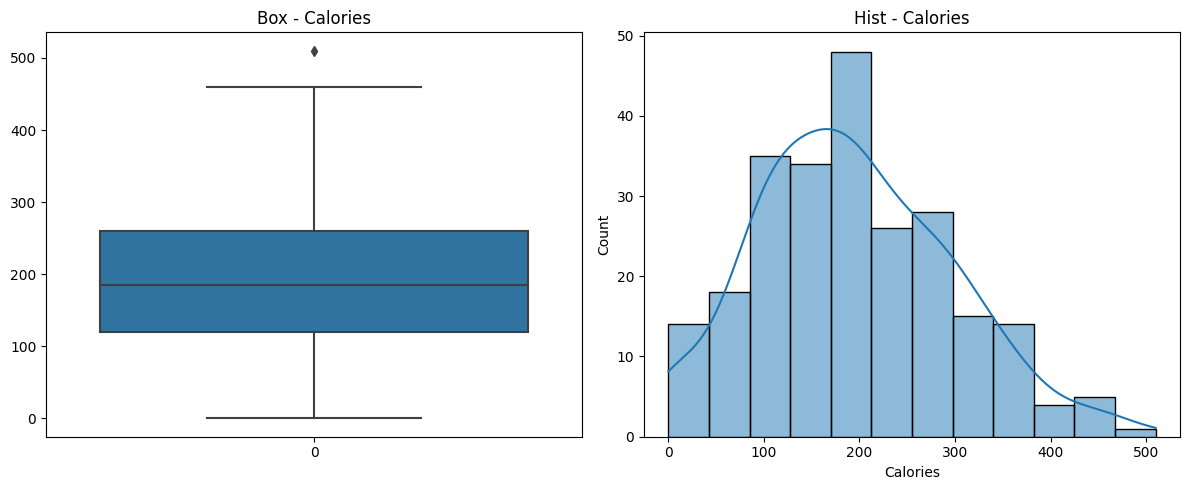

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df['Calories'], ax=axes[0])
axes[0].set_title('Box - Calories')
#Hist
sns.histplot(data=df['Calories'], ax=axes[1], kde=True)
axes[1].set_title('Hist - Calories')

plt.tight_layout()
plt.show()

In [15]:
Q1 = df['Calories'].quantile(0.25)
Q3 = df['Calories'].quantile(0.75)
IQR = Q3 - Q1

df[df['Calories'] > Q3 + 1.5 * IQR]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150


### Total Fat (g)

In [16]:
non_numeric_values = pd.to_numeric(df["Total Fat (g)"], errors='coerce').isnull()
df[non_numeric_values]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0


There is incorrectly typed data, there is a space instead of a decimal point, we are going to correct it and also, we are going to convert the column type to numeric.

In [17]:
fat  = [valor.replace(' ', ',') if ' ' in valor else valor for valor in df["Total Fat (g)"]]
df["Total Fat (g)"] = [float(valor.replace(',', '.')) for valor in fat]

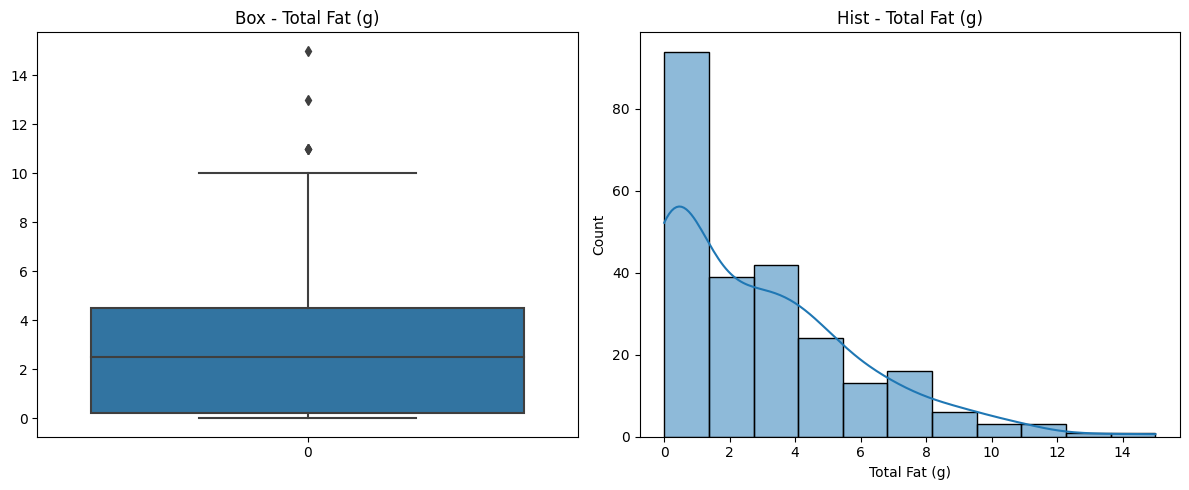

In [18]:
c = "Total Fat (g)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c], ax=axes[1], kde=True)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

In [19]:
Q1 = df[c].quantile(0.25)
Q3 = df[c].quantile(0.75)
IQR = Q3 - Q1

df[df[c] > Q3 + 1.5 * IQR]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
26,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,340,11.0,6.0,0.2,30,180,53,2,43,17.0,20%,2%,45%,30%,180
81,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,400,11.0,7.0,0.2,25,250,61,0,58,15.0,15%,2%,45%,0%,150
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13.0,6.0,0.0,5,290,70,1,64,16.0,15%,2%,60%,20%,150
96,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),2% Milk,380,11.0,6.0,0.3,35,200,63,2,54,17.0,25%,2%,50%,30%,30


According to the boxplot these are outliers. But I consider that for these drinks it may be the case that they really have that value as an amount, since it is not so exaggerated.

### Trans Fat (g)

The variable type is correct. Let's see if there are any strange data in it.

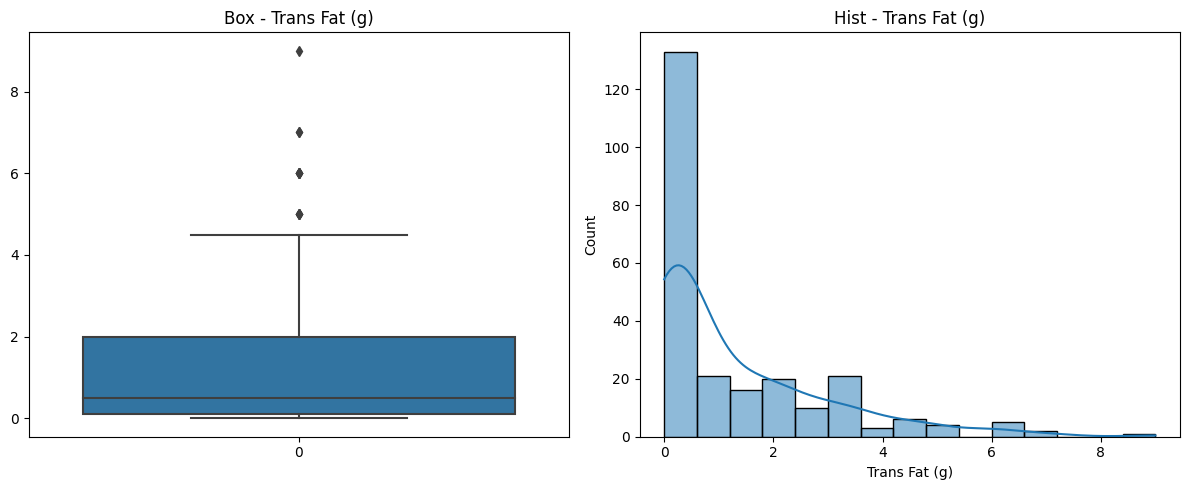

In [20]:
c = "Trans Fat (g)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c], ax=axes[1], kde=True)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

In [21]:
Q1 = df[c].quantile(0.25)
Q3 = df[c].quantile(0.75)
IQR = Q3 - Q1

df[df[c] > Q3 + 1.5 * IQR]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
26,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,340,11.0,6.0,0.2,30,180,53,2,43,17.0,20%,2%,45%,30%,180
78,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,310,9.0,6.0,0.1,20,200,46,0,44,11.0,15%,2%,35%,0%,75
81,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,400,11.0,7.0,0.2,25,250,61,0,58,15.0,15%,2%,45%,0%,150
82,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,370,10.0,5.0,0.0,0,220,56,1,51,13.0,10%,2%,45%,15%,150
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,7.0,6.0,0.0,10,310,78,0,74,19.0,25%,2%,60%,2%,150
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13.0,6.0,0.0,5,290,70,1,64,16.0,15%,2%,60%,20%,150
93,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),2% Milk,290,9.0,5.0,0.2,25,160,47,2,41,14.0,20%,2%,40%,25%,25
96,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),2% Milk,380,11.0,6.0,0.3,35,200,63,2,54,17.0,25%,2%,50%,30%,30
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10.0,5.0,0.3,40,230,72,2,71,17.0,25%,20%,50%,6%,110


As with the previous case, these data appear to be correct despite being classified as atypical. It may be the case that these drinks actually contain a high amount of trans fats compared to the others.

### Saturated Fat (g)

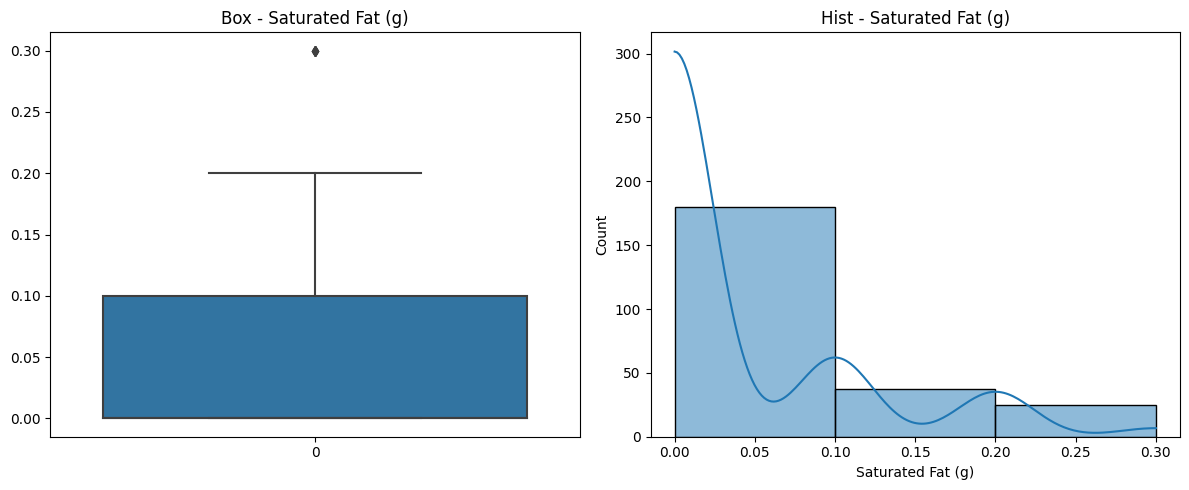

In [22]:
c = "Saturated Fat (g)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c], ax=axes[1], kde=True, bins = 3)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

In [23]:
Q1 = df[c].quantile(0.25)
Q3 = df[c].quantile(0.75)
IQR = Q3 - Q1

df[df[c] > Q3 + 1.5 * IQR]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
14,Classic Espresso Drinks,Caffè Latte,2% Milk,240,9.0,4.5,0.3,35,220,24,0,22,16.0,25%,2%,50%,0%,150
38,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,320,9.0,4.5,0.3,35,200,46,0,44,15.0,25%,2%,45%,0%,150
96,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),2% Milk,380,11.0,6.0,0.3,35,200,63,2,54,17.0,25%,2%,50%,30%,30
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10.0,5.0,0.3,40,230,72,2,71,17.0,25%,20%,50%,6%,110


In the same way, drinks with a higher amount of saturated fats.

### Sodium (mg)

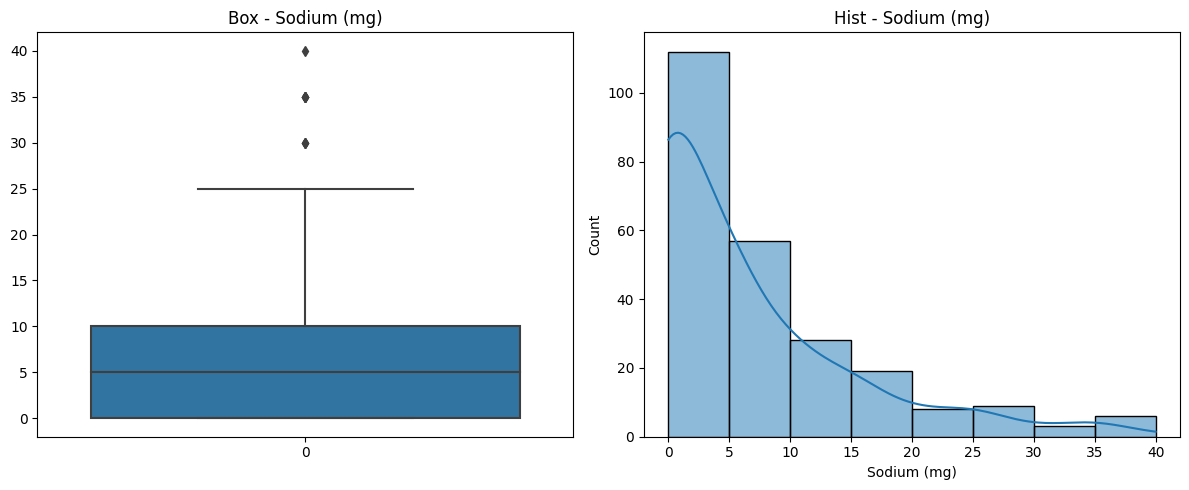

In [24]:
c = "Sodium (mg)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c], ax=axes[1], kde=True, bins = 8)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

In [25]:
Q1 = df[c].quantile(0.25)
Q3 = df[c].quantile(0.75)
IQR = Q3 - Q1

df[df[c] > Q3 + 1.5 * IQR]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
11,Classic Espresso Drinks,Caffè Latte,2% Milk,190,7.0,3.5,0.2,30,170,19,0,17,12.0,20%,2%,40%,0%,150
14,Classic Espresso Drinks,Caffè Latte,2% Milk,240,9.0,4.5,0.3,35,220,24,0,22,16.0,25%,2%,50%,0%,150
26,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,340,11.0,6.0,0.2,30,180,53,2,43,17.0,20%,2%,45%,30%,180
38,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,320,9.0,4.5,0.3,35,200,46,0,44,15.0,25%,2%,45%,0%,150
72,Signature Espresso Drinks,Caramel Macchiato,2% Milk,300,8.0,4.5,0.2,35,180,43,0,40,13.0,20%,2%,40%,0%,150
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
96,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),2% Milk,380,11.0,6.0,0.3,35,200,63,2,54,17.0,25%,2%,50%,30%,30
125,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,350,8.0,4.0,0.2,30,180,57,1,55,14.0,20%,15%,45%,4%,80
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10.0,5.0,0.3,40,230,72,2,71,17.0,25%,20%,50%,6%,110


### Total Carbohydrates (g)

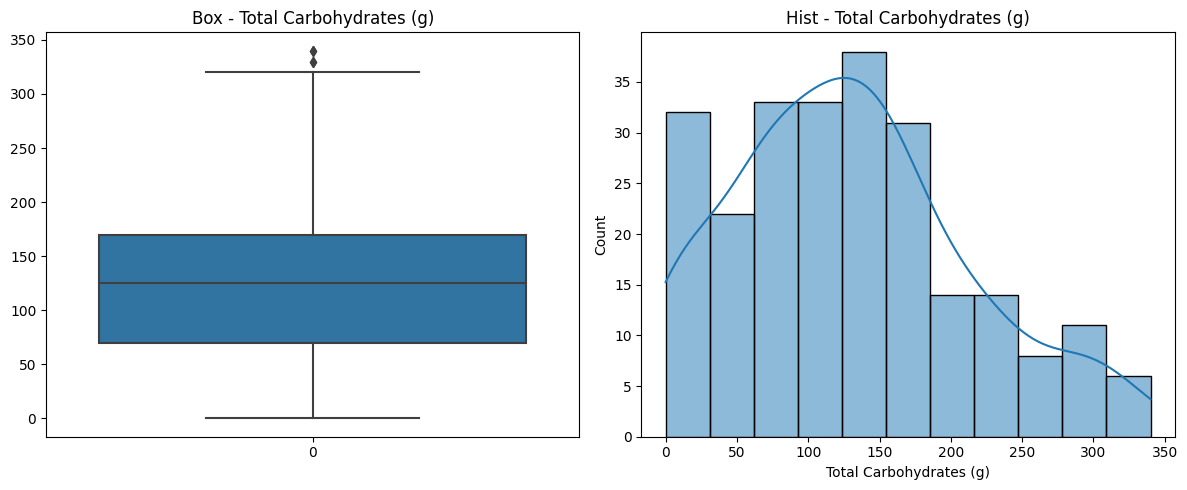

In [26]:
c = "Total Carbohydrates (g)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c], ax=axes[1], kde=True)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

In [27]:
Q1 = df[c].quantile(0.25)
Q3 = df[c].quantile(0.75)
IQR = Q3 - Q1

df[df[c] > Q3 + 1.5 * IQR]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5.0,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10.0,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145
216,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8.0,4.5,0.0,0,330,88,3,80,6.0,6%,0%,20%,40%,145


### Cholesterol (mg)

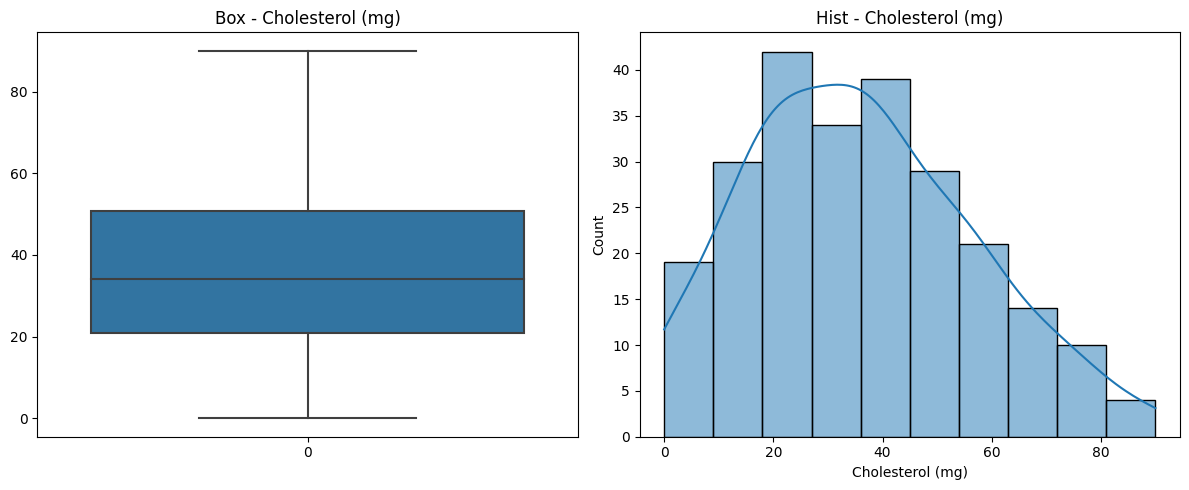

In [28]:
c = "Cholesterol (mg)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c], ax=axes[1], kde=True)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

There are no values above whiskers :) 

### Dietary Fibre (g)

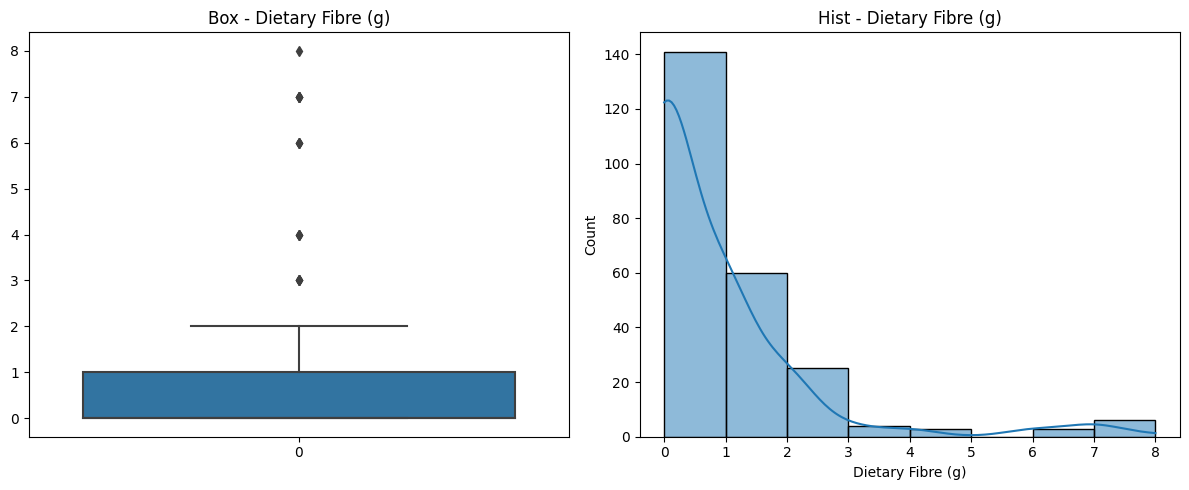

In [29]:
c = "Dietary Fibre (g)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c], ax=axes[1], kde=True, bins = 8)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

In [30]:
Q1 = df[c].quantile(0.25)
Q3 = df[c].quantile(0.75)
IQR = Q3 - Q1

df[df[c] > Q3 + 1.5 * IQR]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
24,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,230,7.0,2.0,0.0,0,105,37,3,26,11.0,10%,0%,35%,40%,175
27,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,290,9.0,2.5,0.0,0,140,47,4,33,14.0,15%,0%,45%,50%,180
94,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,250,7.0,2.0,0.0,0,125,41,3,32,12.0,15%,0%,40%,40%,25
97,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,330,9.0,2.5,0.0,0,160,55,4,44,15.0,15%,0%,50%,50%,30
126,Tazo® Tea Drinks,Tazo® Green Tea Latte,Soymilk,310,6.0,1.0,0.0,0,140,50,3,46,11.0,15%,15%,45%,25%,80
129,Tazo® Tea Drinks,Tazo® Green Tea Latte,Soymilk,390,8.0,1.0,0.0,0,180,64,4,58,14.0,20%,20%,60%,30%,110
172,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10%,15%,20%,0%,Varies
173,Smoothies,Banana Chocolate Smoothie,2% Milk,300,5.0,2.5,0.1,15,160,53,7,34,20.0,8%,15%,20%,20%,15
174,Smoothies,Banana Chocolate Smoothie,Soymilk,290,4.5,1.5,0.0,5,150,51,7,31,19.0,6%,15%,20%,20%,15
175,Smoothies,Orange Mango Banana Smoothie,Grande Nonfat Milk,260,1.0,0.3,0.0,5,120,54,6,37,16.0,50%,80%,10%,30%,15


Without excessively exaggerated or inconsistent values

### Sugars (g)

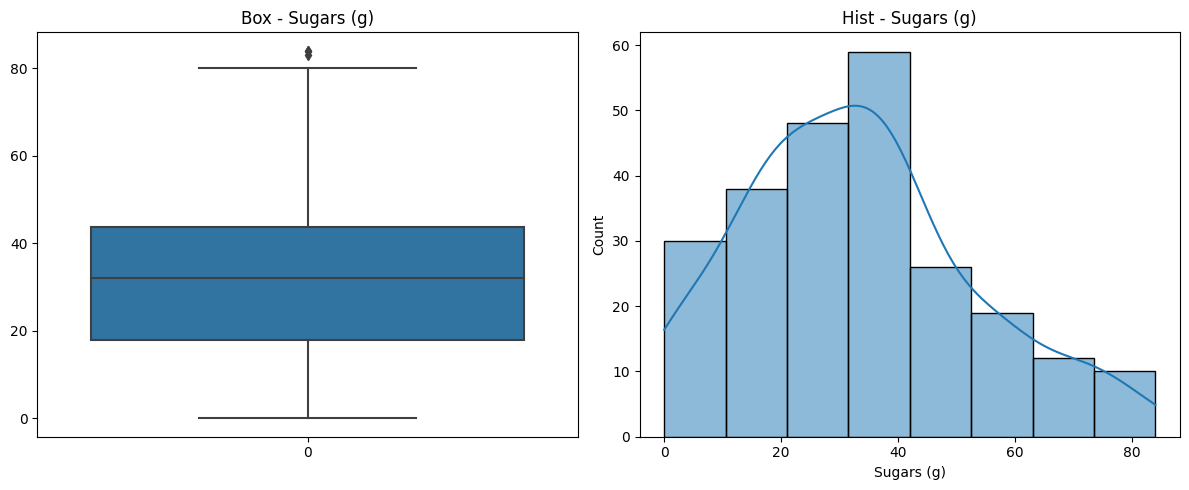

In [31]:
c = "Sugars (g)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c], ax=axes[1], kde=True, bins = 8)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

In [32]:
Q1 = df[c].quantile(0.25)
Q3 = df[c].quantile(0.75)
IQR = Q3 - Q1

df[df[c] > Q3 + 1.5 * IQR]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0.0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5.0,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10.0,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145


### Protein (g)

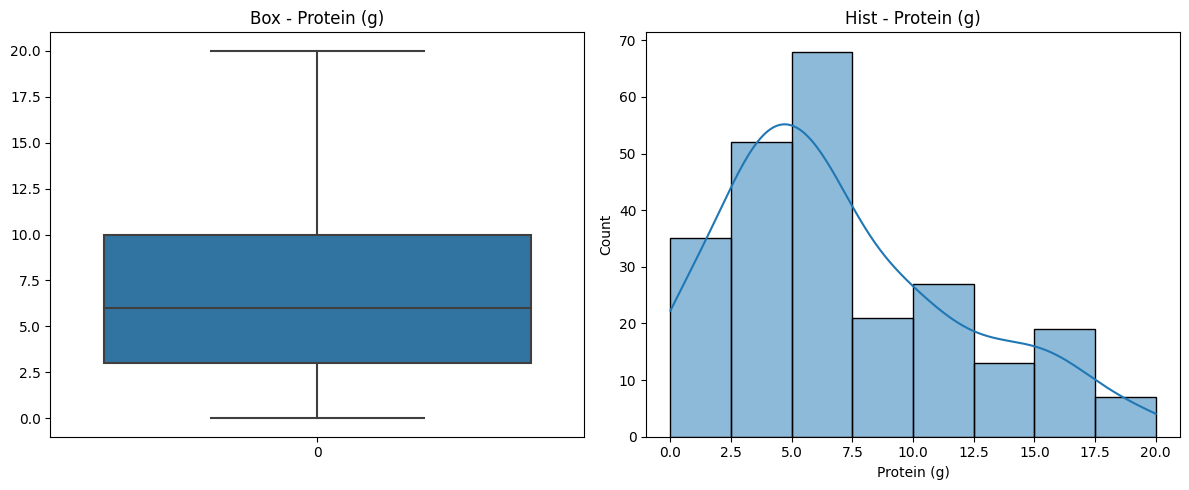

In [33]:
c = "Protein (g)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c], ax=axes[1], kde=True, bins = 8)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

### Vitamin A (% DV)

For this assignment, I consider working the percentages as their numerical values from 0 to 1, so we will do the conversion.

In [34]:
df["Vitamin A (% DV)"] = [float(valor.replace('%', '')) / 100 for valor in df["Vitamin A (% DV)"]]

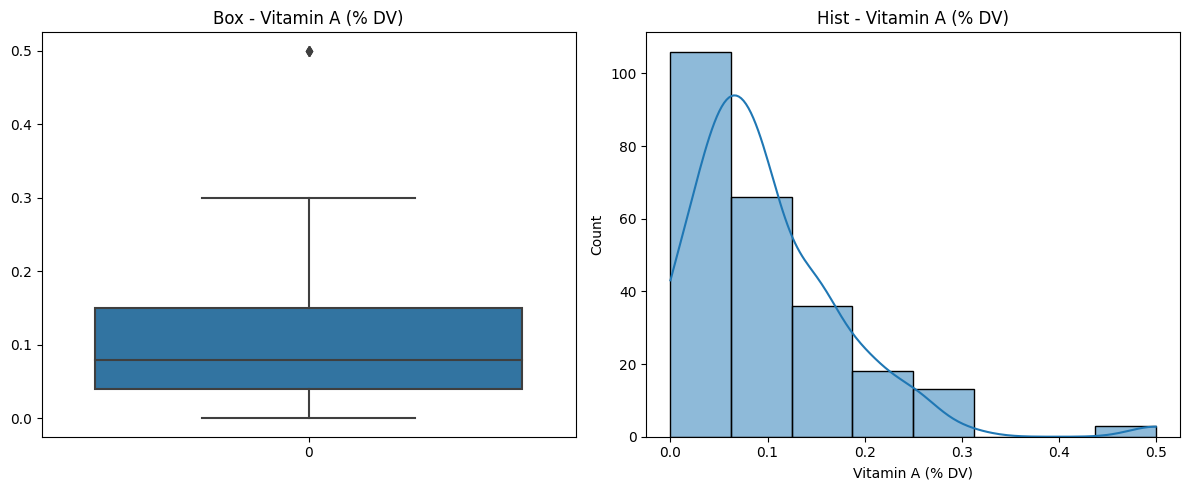

In [35]:
c = "Vitamin A (% DV)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c], ax=axes[1], kde=True, bins = 8)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

In [36]:
Q1 = df[c].quantile(0.25)
Q3 = df[c].quantile(0.75)
IQR = Q3 - Q1

df[df[c] > Q3 + 1.5 * IQR]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
175,Smoothies,Orange Mango Banana Smoothie,Grande Nonfat Milk,260,1.0,0.3,0.0,5,120,54,6,37,16.0,0.5,80%,10%,30%,15
176,Smoothies,Orange Mango Banana Smoothie,2% Milk,270,1.5,0.5,0.0,5,125,53,6,37,16.0,0.5,80%,10%,6%,0
177,Smoothies,Orange Mango Banana Smoothie,Soymilk,270,1.5,0.4,0.0,5,120,53,6,36,15.0,0.5,80%,10%,6%,0


### Vitamin C (% DV)

In [37]:
df["Vitamin C (% DV)"] = [float(valor.replace('%', '')) / 100 for valor in df["Vitamin C (% DV)"]]

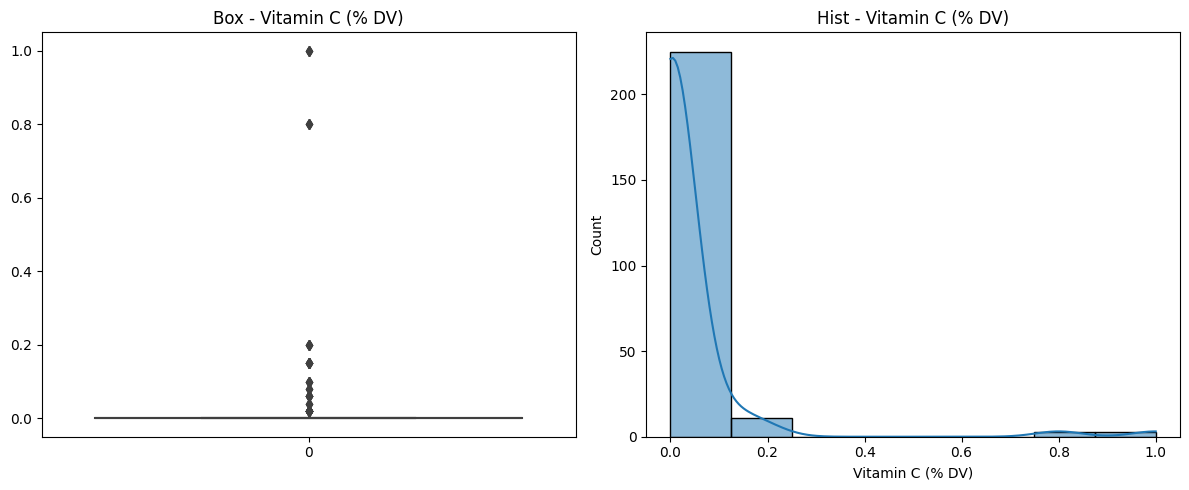

In [38]:
c = "Vitamin C (% DV)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c], ax=axes[1], kde=True, bins = 8)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

In [39]:
Q1 = df[c].quantile(0.25)
Q3 = df[c].quantile(0.75)
IQR = Q3 - Q1

df[df[c] > Q3 + 1.5 * IQR]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
11,Classic Espresso Drinks,Caffè Latte,2% Milk,190,7.0,3.5,0.2,30,170,19,0,17,12.0,0.20,0.02,40%,0%,150
14,Classic Espresso Drinks,Caffè Latte,2% Milk,240,9.0,4.5,0.3,35,220,24,0,22,16.0,0.25,0.02,50%,0%,150
23,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,260,8.0,4.5,0.2,25,140,42,2,34,13.0,0.15,0.02,35%,25%,175
26,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,340,11.0,6.0,0.2,30,180,53,2,43,17.0,0.20,0.02,45%,30%,180
35,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,250,6.0,3.5,0.2,25,150,37,0,35,12.0,0.20,0.02,35%,0%,150
38,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,320,9.0,4.5,0.3,35,200,46,0,44,15.0,0.25,0.02,45%,0%,150
69,Signature Espresso Drinks,Caramel Macchiato,2% Milk,240,7.0,3.5,0.2,25,150,34,0,32,10.0,0.15,0.02,30%,0%,150
72,Signature Espresso Drinks,Caramel Macchiato,2% Milk,300,8.0,4.5,0.2,35,180,43,0,40,13.0,0.20,0.02,40%,0%,150
75,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,200,6.0,3.5,0.1,15,125,31,0,29,7.0,0.08,0.02,25%,0%,75
77,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Tall Nonfat Milk,270,4.5,3.5,0.0,5,190,47,0,45,12.0,0.15,0.02,35%,0%,75


This may seem strange. Starbucks offers a variety of beverages, some of which may be fortified with specific vitamins or ingredients, including vitamin C. Drinks may sometimes be fortified with vitamins or nutritional additions to appeal to health-conscious consumers or consumers with specific needs.

### Calcium (% DV)

In [40]:
df["Calcium (% DV)"] = [float(valor.replace('%', '')) / 100 for valor in df["Calcium (% DV)"]]

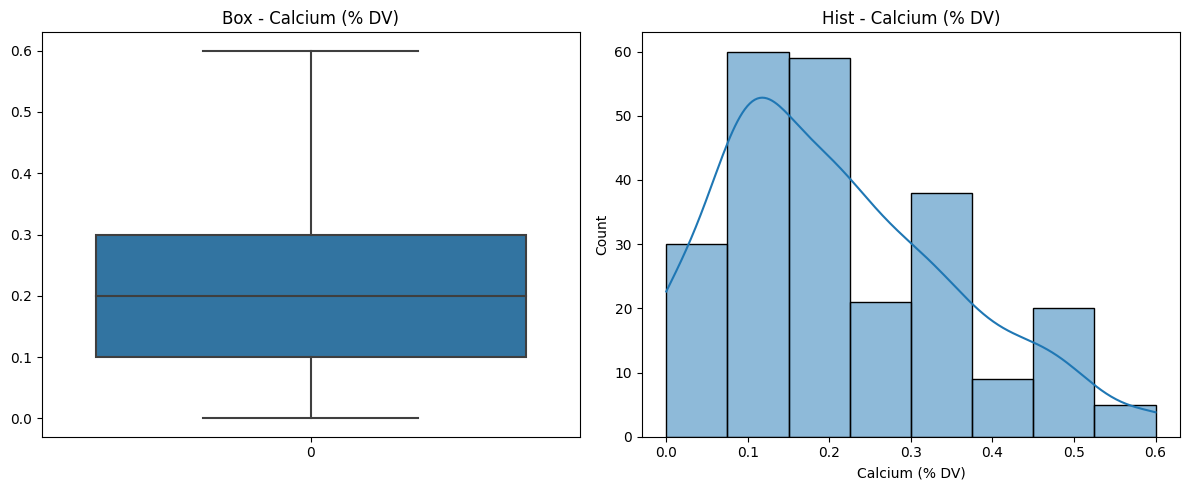

In [41]:
c = "Calcium (% DV)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c], ax=axes[1], kde=True, bins = 8)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

### Iron (% DV)

In [42]:
df["Iron (% DV)"] = [float(valor.replace('%', '')) / 100 for valor in df["Iron (% DV)"]]

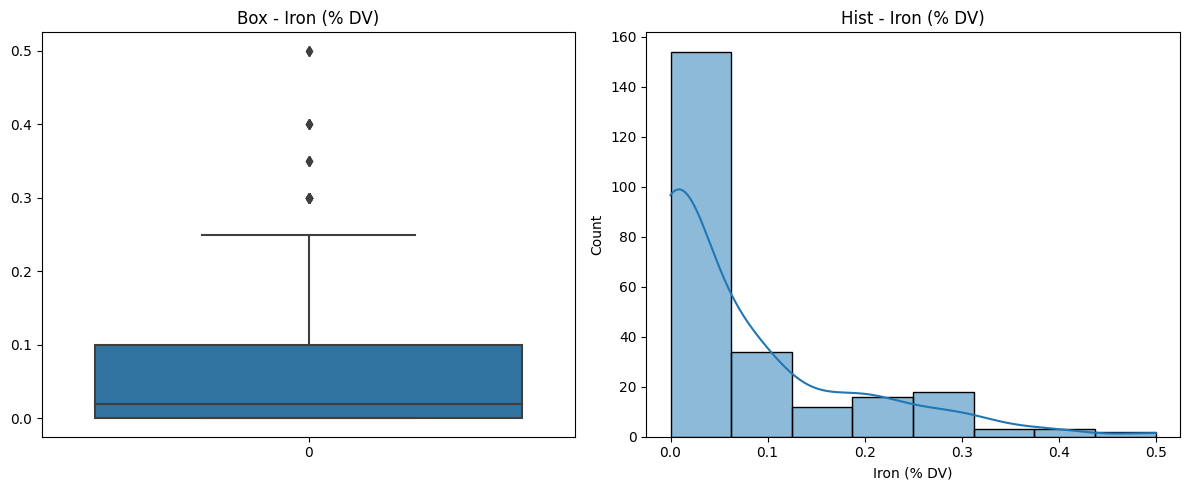

In [43]:
c = "Iron (% DV)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c], ax=axes[1], kde=True, bins = 8)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

In [44]:
Q1 = df[c].quantile(0.25)
Q3 = df[c].quantile(0.75)
IQR = Q3 - Q1

df[df[c] > Q3 + 1.5 * IQR]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
21,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,180,5.0,1.5,0.0,0,85,28,2,20,9.0,0.10,0.00,0.25,0.30,95
24,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,230,7.0,2.0,0.0,0,105,37,3,26,11.0,0.10,0.00,0.35,0.40,175
25,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Venti Nonfat Milk,280,3.0,2.0,0.0,10,160,54,2,44,17.0,0.25,0.00,0.45,0.30,180
26,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,340,11.0,6.0,0.2,30,180,53,2,43,17.0,0.20,0.02,0.45,0.30,180
27,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,290,9.0,2.5,0.0,0,140,47,4,33,14.0,0.15,0.00,0.45,0.50,180
91,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,200,6.0,1.5,0.0,0,95,32,2,25,9.0,0.10,0.00,0.30,0.30,20
94,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,250,7.0,2.0,0.0,0,125,41,3,32,12.0,0.15,0.00,0.40,0.40,25
95,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Venti Nonfat Milk,320,3.0,2.0,0.0,10,180,63,2,55,18.0,0.25,0.00,0.50,0.30,30
96,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),2% Milk,380,11.0,6.0,0.3,35,200,63,2,54,17.0,0.25,0.02,0.50,0.30,30
97,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,330,9.0,2.5,0.0,0,160,55,4,44,15.0,0.15,0.00,0.50,0.50,30


### Caffeine (mg)

In [45]:
non_numeric_values = pd.to_numeric(df["Caffeine (mg)"], errors='coerce').isnull()
df[non_numeric_values]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,Varies
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,Varies
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,0.06,0.00,0.10,0.00,varies
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2.0,1.0,0.1,10,50,15,0,15,3.0,0.06,0.00,0.10,0.00,varies
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,0.04,0.00,0.10,0.06,varies
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,0.10,0.00,0.20,0.00,varies
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,3.0,1.5,0.1,15,75,23,0,23,5.0,0.08,0.00,0.15,0.00,varies
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,0.06,0.00,0.20,0.08,varies


In [46]:
df['Caffeine (mg)'] = df['Caffeine (mg)'].replace('Varies', "-1")
df['Caffeine (mg)'] = df['Caffeine (mg)'].replace('varies', "-1")

For this work, we understand the record "varies" as meaning that the beverage varies in caffeine content depending on the preparation. We transform this value into -1 to facilitate the analysis of numerical values. However, as this represents a category, we will not consider this value for subsequent numerical analyses.

---

In [47]:
cal_na = df[df["Beverage"] == "Iced Brewed Coffee (With Milk & Classic Syrup)"]
cal_na

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
157,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Tall Nonfat Milk,80,0.1,0.0,0.0,0,25,18,0,18,2.0,0.02,0.0,0.06,0.00,90
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1.0,0.5,0.0,5,25,18,0,18,2.0,0.02,0.0,0.06,0.00,NaN
159,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,80,1.0,0.1,0.0,0,20,17,0,17,2.0,0.02,0.0,0.06,0.00,90
160,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Grande Nonfat Milk,110,0.1,0.0,0.0,0,30,24,0,24,2.0,0.04,0.0,0.08,0.02,90
161,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,120,1.5,0.5,0.0,5,35,24,0,24,2.0,0.04,0.0,0.08,0.00,125
162,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,110,1.0,0.1,0.0,0,30,23,0,22,2.0,0.02,0.0,0.08,0.00,125
163,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Venti Nonfat Milk,160,0.1,0.1,0.0,0,50,36,0,36,4.0,0.06,0.0,0.10,0.04,125
164,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,180,2.0,1.0,0.1,10,55,36,0,36,4.0,0.06,0.0,0.10,0.00,170
165,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),Soymilk,170,1.5,0.2,0.0,0,45,34,0,33,3.0,0.04,0.0,0.10,0.00,170


In [48]:
cal_sn = cal_na.dropna()
cal_sn['Caffeine (mg)'] = pd.to_numeric(cal_sn['Caffeine (mg)'], errors='coerce')

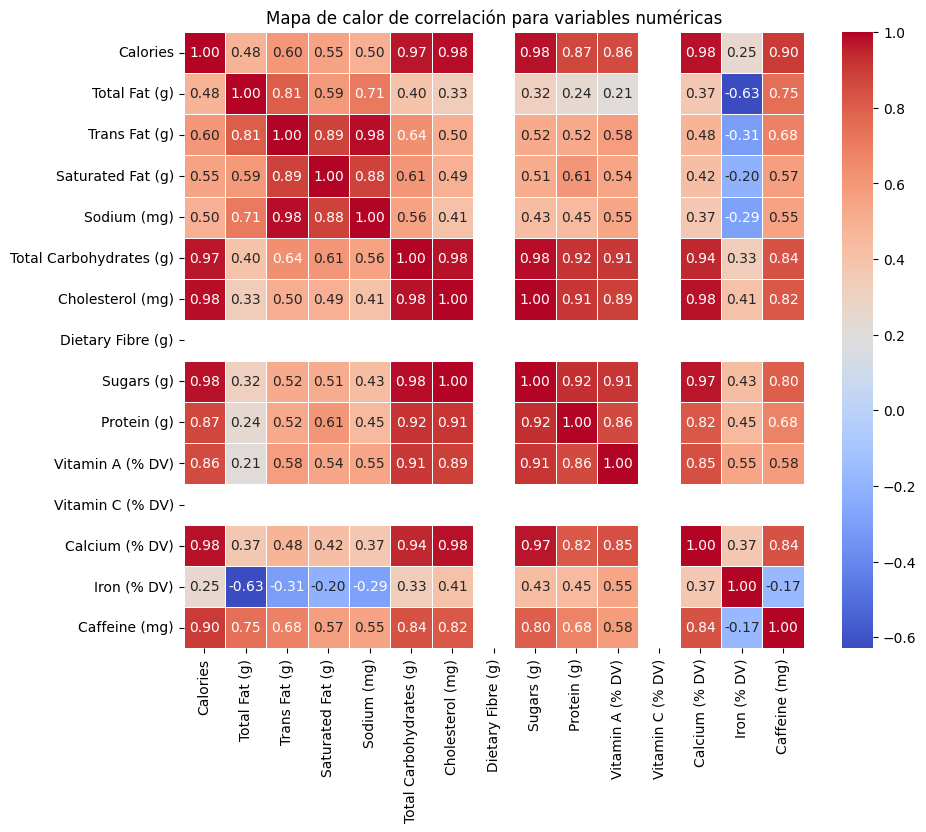

In [49]:
df_numericas = cal_sn.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = df_numericas.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de calor de correlación para variables numéricas')
plt.show()

We see that there is a NaN value. We are going to find the type of drink, and since the Calories variable has a good linear correlation with the caffeine variable, we are going to use it to fit a linear regression model and predict that missing value.

In [50]:
X_test = cal_sn['Calories'].values.reshape(-1, 1)
y_test = cal_sn["Caffeine (mg)"].values.reshape(-1, 1)

In [51]:
lr = LinearRegression()
lr.fit(X_test, y_test)

LinearRegression()

In [52]:
predicciones = lr.predict(X_test)

mse = mean_squared_error(y_test, predicciones)
print("Error cuadrático medio (MSE):", mse)

r2 = r2_score(y_test, predicciones)
print("Coeficiente de determinación (R^2):", r2)

Error cuadrático medio (MSE): 184.15411355735807
Coeficiente de determinación (R^2): 0.8085933695871552


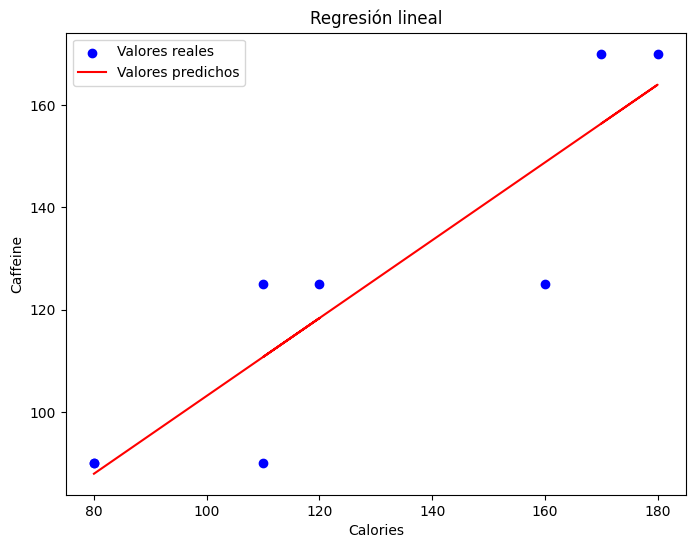

In [53]:
plt.figure(figsize=(8, 6))

plt.scatter(X_test, y_test, color='blue', label='Valores reales')

plt.plot(X_test, predicciones, color='red', label='Valores predichos')

plt.xlabel('Calories')
plt.ylabel('Caffeine')
plt.title('Regresión lineal')

plt.legend()

plt.show()

In [54]:
n = cal_na[cal_na["Caffeine (mg)"].isnull()]
lr.predict(n["Calories"].values.reshape(-1,1))

array([[95.59096176]])

We are going to round this value to 96. We proceed to replace in the original data.

In [55]:
df['Caffeine (mg)'] = df['Caffeine (mg)'].fillna("96")
df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'], errors='coerce')

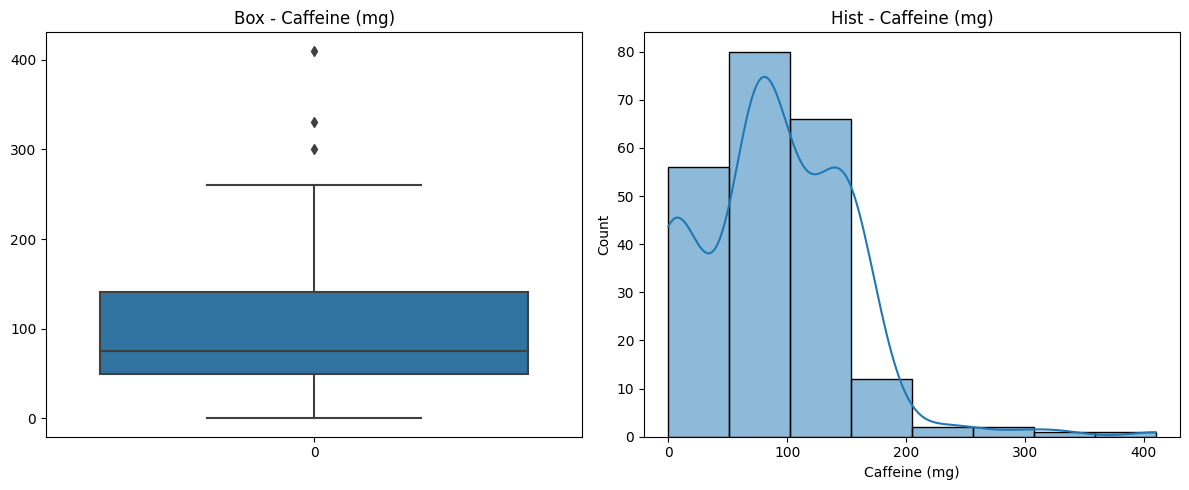

In [56]:
c = "Caffeine (mg)"
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
#Box
sns.boxplot(data=df[c][df[c] != -1], ax=axes[0])
axes[0].set_title(f'Box - {c}')
#Hist
sns.histplot(data=df[c][df[c] != -1], ax=axes[1], kde=True, bins = 8)
axes[1].set_title(f'Hist - {c}')

plt.tight_layout()
plt.show()

In [57]:
Q1 = df[c].quantile(0.25)
Q3 = df[c].quantile(0.75)
IQR = Q3 - Q1

df[df[c] > Q3 + 1.5 * IQR]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.00,0.0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.02,0.0,410


---

In [58]:
df.to_csv('starbucks_c.csv', index=False)

This part ends here. Next it's time to make the report, for this I plan to practice the PowerBI software. If there are any corrections to make, let me know in the comments. Until the next update.